# Fourier Series: Bézier Curves
This notebook shows how to compute the Fourier series of Bézier curves.

### Content
1. [Prerequisites](#prerequisites)
2. [Representing Bézier curves](#representation)
3. [Fourier Series of Bézier curves](#fourier_computation)
    1. [Proof](#proof)
    2. [Implementation](#implementation)
4. [Example](#example)

In [1]:
%matplotlib inline

# Initial imports
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import comb, perm

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## Prerequisites <a id='prerequisites'></a>
This notebook shows how to compute the Fourier series of straight lines and polygones. For this, you should be familiar with:
- The general computation of [Fourier series of curves](Fourier-Series-of-Curves-Background.ipynb) and especially the case of piecewiese defines curves.
- Complex numbers, especially the representation of 2-dimensional points as complex numbers
- Computation of integrals of curves

## Representing Bézier curves <a id='representation'></a>
Bézier curves are often used in vector graphics (such as svg images) due to their intuitive representation and some nice properties. A Bézier curve of degree $n$ is defined by a sequence of $n+1$ *control points* $p_0,\ldots,p_n$ , which provide a rough intuition about the path of the curve.

Mathematically, a Bézier curve $g:[0,1]\to\mathbb{C}$ with control points $p_0,\ldots,p_n\in\mathbb{C}$ is defined as:
$$
\begin{equation}
    g(t) = \sum_{i=0}^n b^n_i(t) p_i
    \label{eqn:bezier}
\end{equation}
$$

with the Bernstein polynomial
$$
\begin{equation}
    b^n_i(t) = {n \choose i}t^i(1-t)^{n-i}
\end{equation}
$$

In some cases, we might need to define a Bézier curve over an arbitrary interval $[a,b]$. In this case, we use $g_{a,b}:[a,b]\to\mathbb{C}$ with 

$$
\begin{equation}
    g_{a,b}(t) = g_{0,1}\left(\frac{t-a}{b-a}\right) = g\left(\frac{t-a}{b-a}\right)
\end{equation}
$$

#### Properties
Some properties of Bézier curves are:
- $p_0 = g(0)$ is the start and $p_n = g(1)$ is the end point of the curve
- $p_1 - p_0$ is the derivate in point $p_0$ and $p_n - p_{n-1}$ is the derivate in point $p_n$
- The derivative is given by a Bézier curve of degree $n-1$ with control points $q_i = n(p_{i+1}-p_{i})$
- More general: the $r$-th derivative is a Bézier curve of degree $n-1$ with control points $q_i = \frac{n!}{(n-r)!}\sum_{j=0}^r {r\choose j}(-1)^{r-j}p_{i+j}$

## Fourier Series of Bézier curves <a id='fourier_computation'></a>
As described in the [introduction of Fourier series of curves](Fourier-Series-of-Curves-Background.ipynb) we need to solve the integral $\int_a^b g_{a,b}(t)e^{-i\lambda t}dt$ for an arbitrary Bézier curve $g_{a,b}$ over an interval $[a,b]$ and any $\lambda\in\mathbb{R}$ in order to compute the Fourier coefficients.

--------------------------

_Case 1:_ $\lambda=0$:  
$$ 
\begin{equation}
    \int_a^b g(t)e^{-i\lambda t}dt = \frac{b-a}{n+1} \sum_{j=0}^n p_j
    \label{eqn:integral_lambda0}
\end{equation}
$$

_Case 2:_ $\lambda\neq 0$:  
$$ 
\begin{equation}
    \int_a^b g(t)e^{-i\lambda t}dt = -(b-a) e^{-i\lambda a}\sum_{r=0}^n\frac{1}{(i(b-a)\lambda)^{r+1}}\frac{n!}{(n-r)!}\sum_{j=0}^r{r \choose j}(-1)^{r-j}\left(p_{n-r+j}e^{-i(b-a)\lambda} - p_{j}\right)
    \label{eqn:integral_lambda_not0}
\end{equation}
$$


### Proof: <a id='proof'></a>
At the beginning, we see that

$$
\begin{align}
    \int_a^b g_{a,b}(t)e^{-i\lambda t}dt ={}& \int_a^b g\left(\frac{t-a}{b-a}\right)e^{-i\lambda t}dt \nonumber\\
        \stackrel{t=(b-a)u+a}={}& \int_0^1 g(u)e^{-i\lambda ((b-a)u+a)}\cdot(b-a)du \nonumber\\
        ={}& (b-a) e^{-i\lambda a}\int_0^1 g(u)e^{-i\lambda(b-a)u}du \label{eqn:from_ab_to_01}
\end{align}
$$

This means, that we only need to solve the integral for $g=g_{0,1}$ and can use $(\ref{eqn:from_ab_to_01})$ to generalize to $g_{a,b}$.

_Case 1:_ $\lambda=0$:  
The derivative of a Bézier curve $G:[0,1]\to\mathbb{C}$ of degree $n+1$ with control points $q_0,\ldots,q_{n+1}$ is given by:
$$
\begin{equation}
    G'(t) = (n+1)\sum_{i=0}^n b^n_i(t) (q_{i+1}-q_i)
    \label{eqn:antiderivative}
\end{equation}
$$

Comparing $(\ref{eqn:antiderivative})$ with $(\ref{eqn:bezier})$ show that in case of $q_i := \frac{1}{n+1}\sum_{j=0}^{i-1} p_j$ the Bézier curve $G$ is the antiderivate of Béziercurve $g$.

Thus:

$$
\begin{align*}
    \int_0^1 g(t)e^{-i\lambda t}dt = \int_0^1 g(t)dt = \left[G(t)\right]_{t=0}^{1} = G(1) - G(0) = q_{n+1}-q{0} = \frac{1}{n+1}\sum_{j=0}^n p_j
\end{align*}
$$

_Case 2:_ $\lambda\neq 0$:  
Given a Bézier curve $g$ of degree $n$, we get:

$$
\begin{align*}
    \int_0^1 g(t)e^{-i\lambda t}dt ={}& -\left[g(t)\frac{e^{i\lambda t}}{-i\lambda}\right]_{t=0}^1 + \frac{1}{i\lambda}\int_0^1 g'(t)e^{-i\lambda t}dt\\
    ={}& -\left[g(t)\frac{e^{-i\lambda t}}{i\lambda}\right]_{t=0}^1 -\left[g'(t)\frac{e^{-i\lambda t}}{(i\lambda)^2}\right]_{t=0}^1 + \frac{1}{(i\lambda)^2}\int_0^1 g''(t)e^{-i\lambda t}dt\\
    ={}& \ldots\\
    ={}& -\sum_{r=0}^n\left[g^{(r)}(t)\frac{e^{-i\lambda t}}{(i\lambda)^{r+1}}\right]_{t=0}^1 + \frac{1}{(i\lambda)^{n+1}}\int_0^1 g^{(n+1)}(t)e^{-i\lambda t}dt
    \label{eqn:integral_step_1}
\end{align*}
$$

Since the $(n+1)$-th derivation of a Bézier curve of degree $n$ is constantly 0, we get:

$$
\begin{align}
    \int_0^1 g(t)e^{-i\lambda t}dt ={}& -\sum_{r=0}^n\left[g^{(r)}(t)\frac{e^{-i\lambda t}}{(i\lambda)^{r+1}}\right]_{t=0}^1 \nonumber\\
    ={}& -\sum_{r=0}^n\frac{1}{(i\lambda)^{r+1}}\left(g^{(r)}(1)e^{-i\lambda}-g^{(r)}(0)\right)
    \label{eqn:integral_step_2}
\end{align}
$$

Here, the $r$-th derivatives of $g$ are given by:
$$
\begin{equation*}
    g^{(r)}(t) = \frac{n!}{(n-r)!}\sum_{k=0}^{n-r} b^{n-r}_k(t)\sum_{j=0}^r{r \choose j}(-1)^{r-j}p_{k+j}
\end{equation*}
$$

which simplifies for $t=0$ to:
$$
\begin{equation}
    g^{(r)}(0) = \frac{n!}{(n-r)!}\sum_{j=0}^r{r \choose j}(-1)^{r-j}p_{j}
    \label{eqn:derivative_0}
\end{equation}
$$
and for $t=1$ to
$$
\begin{equation}
    g^{(r)}(1) = \frac{n!}{(n-r)!}\sum_{j=0}^r{r \choose j}(-1)^{r-j}p_{n-r+j}
    \label{eqn:derivative_1}
\end{equation}
$$

Combining $(\ref{eqn:integral_step_2})$, $(\ref{eqn:derivative_0})$ and $(\ref{eqn:derivative_1})$ leads to:
$$
\begin{equation}
    \int_0^1 g(t)e^{-i\lambda t}dt = -\sum_{r=0}^n\frac{1}{(i\lambda)^{r+1}}\frac{n!}{(n-r)!}\sum_{j=0}^r{r \choose j}(-1)^{r-j}\left(p_{n-r+j}e^{-i\lambda} - p_{j}\right)
    \label{eqn:integral_step_3}
\end{equation}
$$

### Implementation <a id='implementation'></a>
We begin with evaluation a Bézir curve a point $t$:

In [3]:
def eval_bezier(p, t):
    t = np.asarray(t)
    s = t.shape
    
    t = np.reshape(t, (-1,1))
    
    p = np.reshape(p, (1,-1))
    n = p.shape[1] - 1
    
    j = np.arange(n+1)
    j = np.reshape(j, p.shape)
    
    q = np.sum(
        comb(n,j)*np.power(t,j)*np.power(1-t,n-j) * p,
        axis = 1
    )
    
    q = np.reshape(q, s)
    
    return q

Example curve:

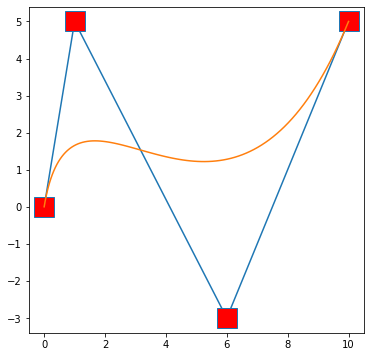

In [4]:
p = [0, 1+5j, 6-3j ,10+5j]

plt.figure(figsize=(6,6))
plt.plot(np.real(p),np.imag(p), marker='s', ms=20, markerfacecolor='red')

q = eval_bezier(p, np.arange(101,dtype=float) / 100)
plt.plot(np.real(q),np.imag(q))

plt.show()

Implementing equations $(\ref{eqn:integral_lambda0})$ and $(\ref{eqn:integral_lambda_not0})$:

In [5]:
def transform_bezier(p, l, a, b):
    i = 1j   # Just for shorter notations
    
    l = np.asarray(l)
    s = l.shape
    l = np.reshape(l, (-1))
    result = np.zeros(shape=l.shape, dtype=np.complex)
    
    p = np.asarray(p)
    p = np.reshape(p, (-1))
    n = np.prod(p.shape) - 1
    
    # Handle Case k != 0
    l_ = np.reshape(l[l!=0], (-1))
    
    # Iterate over r:
    for r in range(n+1):
        j = np.reshape(np.arange(r+1, dtype=int),(1,-1))
        
        u = comb(r, j) * np.power(-1, r - j) * (p[n-r+j] * np.exp(-i * (b-a) * np.reshape(l_,(-1,1))) - p[j])
        result[l!=0] = result[l!=0] + np.sum(u, axis=1) * perm(n,r) / np.power(i * (b-a)*l_, r+1)
    
    # Add factor
    result[l!=0] = -(b-a)*np.exp(-i*l_*a)*result[l!=0]
    
    
    # Handle case k=0
    result[l==0] = (b-a) * np.sum(p) / (n+1)
    
    result = np.reshape(result, s)
    
    # Return results
    return result

Extending this to closed sequences of lines. Here we scale the period so that the length $T=2\pi$.

_Note:_ There are different ways to determine the segment-borders $t_0,\ldots,t_m$. Here we use the length of the curves. For this, we need to approximate the length:

In [6]:
def bezier_len(p, m=100):
    t = np.arange(m+1,dtype=float) / m
    t = np.reshape(t, (-1,1))
    
    eval_bezier(p, t)
    
    l = np.sum(np.abs(q[1:] - q[:-1]))
    
    return l
    

And then transform the spline segments:

In [7]:
def transform_bezier_spline(segments, n):
    m = len(segments)   # Number of Segments 
    
    # Length of the segments
    l = [bezier_len(p) for p in segments]
    l = np.asarray(l)
    
    # Compute t_0 to t_m based on the lengths with t_0 = 0 and t_m = 2\pi
    t = l.cumsum() / l.sum()
    t = 2 * np.pi * np.concatenate([[0], t])
    
    # get vector of k
    k = np.arange(-n,n+1)
    
    c = sum([transform_bezier(segments[i], k, t[i], t[i+1]) for i in range(m)]) / (2 * np.pi)
    
    return c, k


Get the fourier approximation as a function.  
This will be used to plot the fourier approximation.

In [8]:
def get_fourier_fct(c, k):
    # Reshape the fourier coefficients row vectors
    c = np.reshape(c, (1,-1))
    k = np.reshape(k, (1,-1))
    
    def fct(t):
        # Reshape the input values into a column vector
        t = np.reshape(t, (-1,1))
        
        return np.sum(c * np.exp(1j * k * t), axis=1)
    
    return fct

## Example: Bézier Spline <a id='example'></a>
Works also with other polygons, just add or modify points.

In [9]:
# Corner points of the triangle as complex numbers
segments = [
    [0, 1+5j, 7-3j ,10+5j],
    [10+5j, 15, 6-4j],
    [6-4j, 6, 0]
]

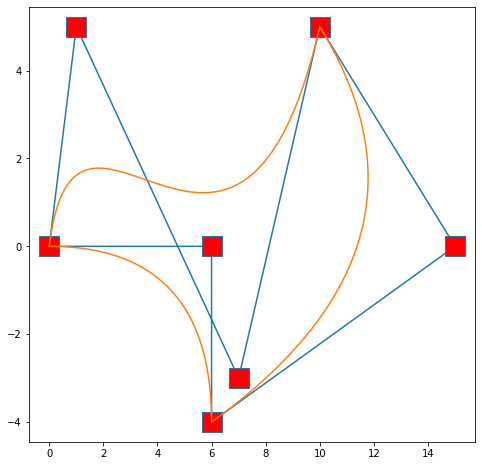

In [10]:
q = [eval_bezier(segment, np.arange(101,dtype=float) / 100) for segment in segments]
q = np.concatenate(q)

p = np.concatenate(segments)

plt.figure(figsize=(8,8))
plt.plot(np.real(p),np.imag(p), marker='s', ms=20, markerfacecolor='red')
plt.plot(np.real(q),np.imag(q))

plt.show()

In [11]:
N = 12

# Compute coefficients c_{-N} to c_N
c,k = transform_bezier_spline(segments, N)

# Get approximations (limited to different values n=1,...,N)
fcts = [get_fourier_fct(c[np.abs(k) <= n], k[np.abs(k) <= n]) for n in range(1,N+1)]

Plotting the results

In [12]:
# plot closed curve of complex 
def plotcc(p, *args, **kwargs):
    # close curve
    m = len(p)
    p = np.reshape(p, (-1))
    p = p[list(range(m)) + [0]]     # Closing the curve
    
    # Complex to real x and y vectors
    x, y = np.real(p), np.imag(p)
    
    plt.plot(x, y, *args, **kwargs)

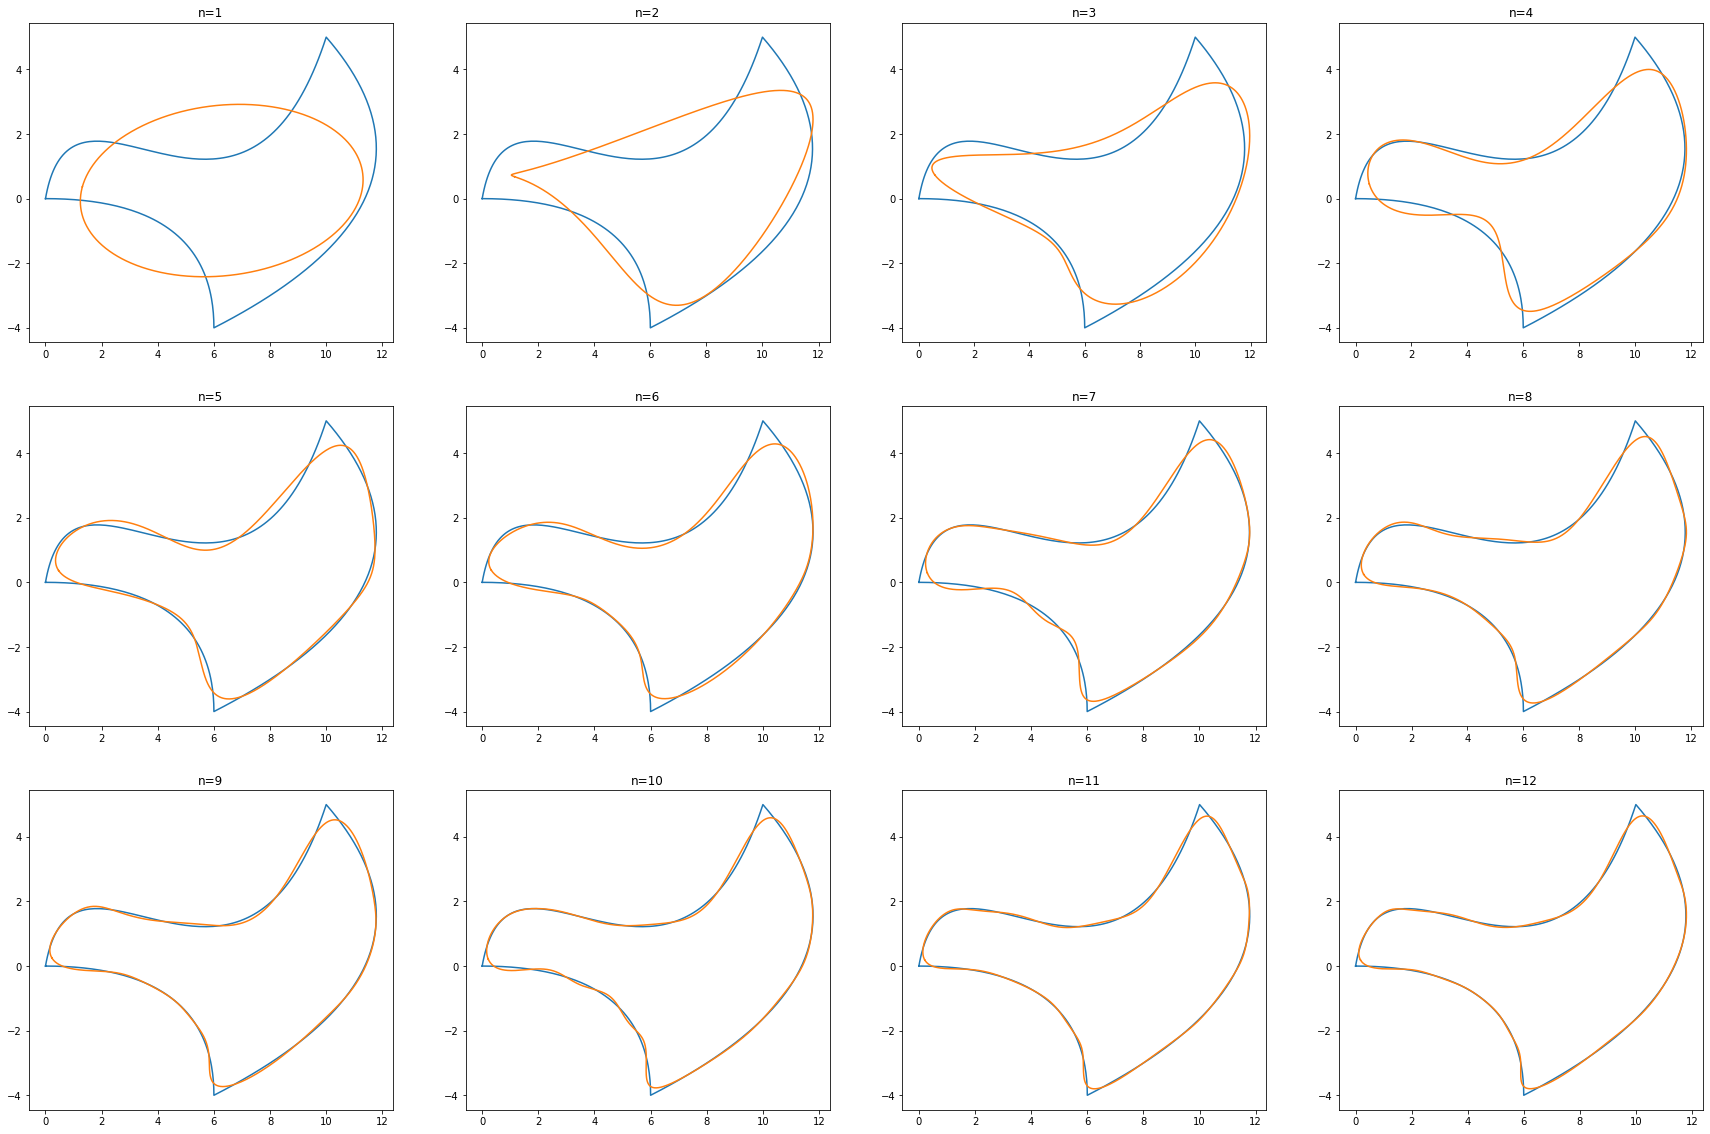

In [13]:
plt.figure(figsize=(30,20))

# Number of points
nT = 1000

t = 2 * np.pi * np.arange(0,1, 1/nT)

for n in range(1, N+1):
    pf = fcts[n-1](t)
    
    plt.subplot(3,4,n)
    plotcc(q)
    plotcc(pf)
    plt.title(f"n={n}")

plt.show()